In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('galaxy.csv')

In [28]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1179 non-null   object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [30]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


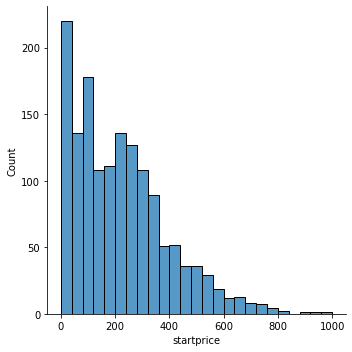

In [31]:
sns.displot(data['startprice'])

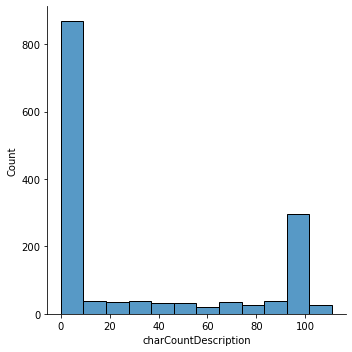

In [32]:
sns.displot(data['charCountDescription'])

<AxesSubplot:xlabel='productline', ylabel='startprice'>

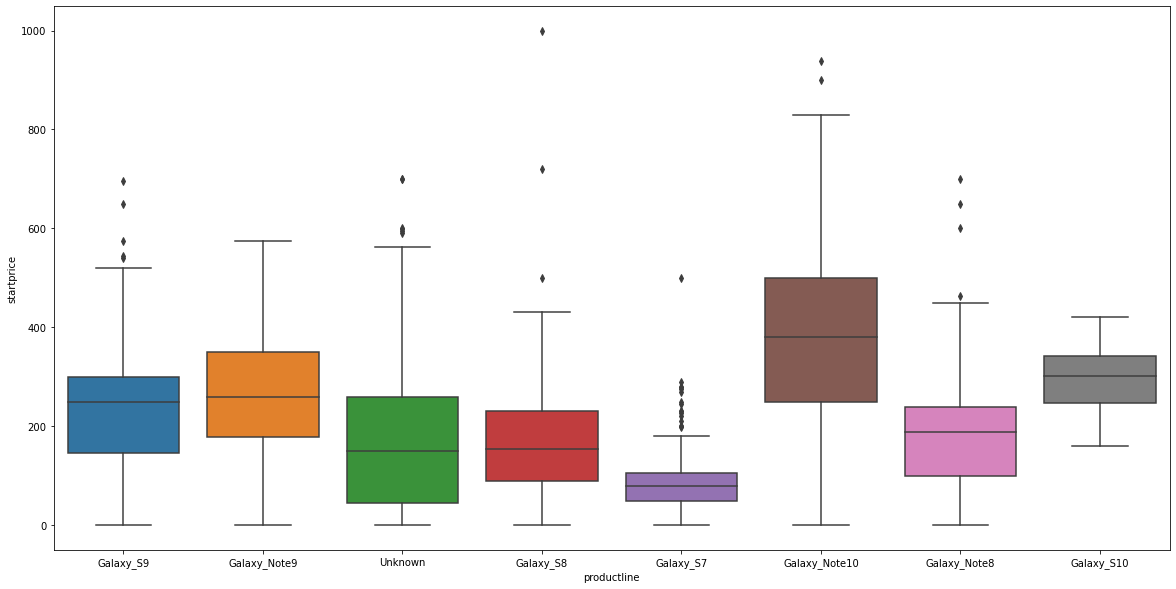

In [33]:
plt.figure(figsize=(20,10))
sns.boxplot(x='productline', y='startprice', data=data)

In [34]:
data.isnull().sum() / len(data)

BuyItNow                0.000000
startprice              0.000000
carrier                 0.206061
color                   0.399327
productline             0.000000
noDescription           0.000000
charCountDescription    0.000000
upperCaseDescription    0.000000
sold                    0.000000
dtype: float64

In [35]:
data = data.fillna('Unknown')

In [36]:
data

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,Unknown,Galaxy_S7,no description,96,2,0
1481,0,239.95,None,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,None,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,None,Midnight Black,Galaxy_S7,no description,92,2,1


In [37]:
data['carrier'].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

In [38]:
data[['carrier', 'color', 'productline', 'noDescription']].nunique()

carrier          5
color            8
productline      8
noDescription    2
dtype: int64

In [39]:
data['carrier'].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

In [45]:
data['color'].value_counts()

Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: color, dtype: int64

In [46]:
data['productline'].value_counts()

Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: productline, dtype: int64

In [47]:
data['noDescription'].value_counts()

contains description    856
no description          629
Name: noDescription, dtype: int64

In [48]:
def black(x):
    if x == 'Midnight Black' or x == 'Aura Black' or x == 'Prism Black':
        return 'Black'
    else:
        return x

In [49]:
data['color'].apply(lambda x: black(x)).value_counts()

Unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: color, dtype: int64

In [50]:
my_list = ['orange', 'apple', 'grape']

In [51]:
'melon' in my_list

False

In [52]:
def black(x):
    if x in ['Midnight Black', 'Aura Black', 'Prism Black']:
        return 'Black'
    else:
        return x

In [53]:
data['color'] = data['color'].apply(lambda x: black(x))

In [54]:
data['color'].value_counts()

Unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: color, dtype: int64

In [63]:
data = pd.get_dummies(data, columns = ['carrier', 'color', 'productline', 'noDescription'], drop_first=True)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = data.drop('sold', axis=1)
y = data['sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [66]:
X

,BuyItNow,startprice,charCountDescription,upperCaseDescription,carrier_None,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,color_Gold,color_Space Gray,color_Unknown,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description
0,0,199.99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,235.00,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,0,199.99,100,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1
3,1,175.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,1,100.00,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,89.50,96,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1481,0,239.95,97,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1482,0,329.99,93,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1483,0,89.00,92,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model = DecisionTreeClassifier(max_depth = 10)

In [69]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [72]:
pred = model.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [75]:
accuracy_score(y_test, pred)

0.8013468013468014

In [80]:
for i in range(2, 31):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(i, ':', round(accuracy_score(y_test, pred), 4))

2 : 0.8182
3 : 0.8215
4 : 0.8215
5 : 0.8182
6 : 0.8081
7 : 0.798
8 : 0.8081
9 : 0.8047
10 : 0.8047
11 : 0.7744
12 : 0.7609
13 : 0.7609
14 : 0.7643
15 : 0.7778
16 : 0.771
17 : 0.7744
18 : 0.7576
19 : 0.7576
20 : 0.7811
21 : 0.7542
22 : 0.7576
23 : 0.7609
24 : 0.7778
25 : 0.7441
26 : 0.7441
27 : 0.7609
28 : 0.7508
29 : 0.7542
30 : 0.7508


In [83]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
round(accuracy_score(y_test, pred), 4)

0.8215

In [85]:
confusion_matrix(y_test, pred)

array([[148,  13],
       [ 40,  96]])

In [86]:
from sklearn.tree import plot_tree

[Text(558.0, 475.65000000000003, 'BuyItNow <= 0.5\n0.497\n1188\n[638, 550]'),
 Text(279.0, 339.75, 'startprice <= 208.495\n0.357\n659\n[506, 153]'),
 Text(139.5, 203.85000000000002, 'productline_Galaxy_S9 <= 0.5\n0.442\n240\n[161, 79]'),
 Text(69.75, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 203.85000000000002, 'upperCaseDescription <= 5.5\n0.291\n419\n[345, 74]'),
 Text(348.75, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 67.94999999999999, '\n  (...)  \n'),
 Text(837.0, 339.75, 'startprice <= 142.475\n0.375\n529\n[132, 397]'),
 Text(697.5, 203.85000000000002, 'startprice <= 59.995\n0.216\n332\n[41, 291]'),
 Text(627.75, 67.94999999999999, '\n  (...)  \n'),
 Text(767.25, 67.94999999999999, '\n  (...)  \n'),
 Text(976.5, 203.85000000000002, 'startprice <= 205.0\n0.497\n197\n[91, 106]'),
 Text(906.75, 67.94999999999999, '\n  (...)  \n'),
 Text(1046.25, 67.94999999999999, '\n  (...)  \n')]

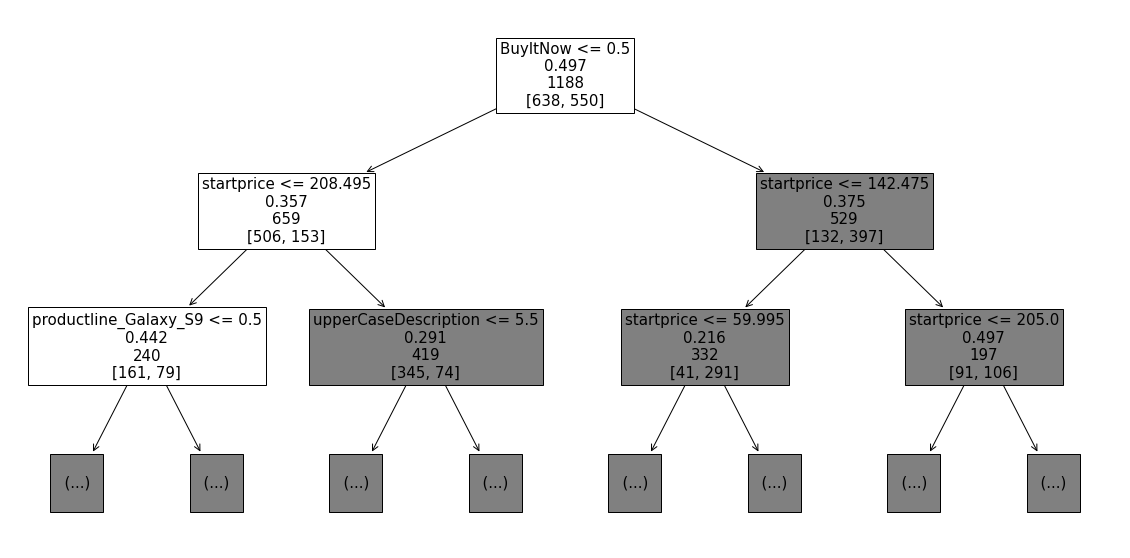

In [90]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names = X_train.columns, fontsize = 15, label = 'None', max_depth = 2)